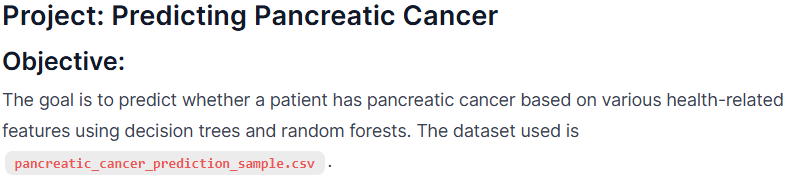

In [61]:
import pandas as pd

df = pd.read_csv('/content/pancreatic_cancer_prediction_sample.csv')

In [62]:
df.head()

,Country,Age,Gender,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,...,Stage_at_Diagnosis,Survival_Time_Months,Treatment_Type,Survival_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Processed_Food,Access_to_Healthcare,Urban_vs_Rural,Economic_Status
0,Canada,64,Female,0,0,0,0,0,0,0,...,Stage III,13,Surgery,0,0,Medium,Low,High,Urban,Low
1,South Africa,77,Male,1,1,0,0,0,0,0,...,Stage III,13,Chemotherapy,0,1,Medium,Medium,Medium,Urban,Low
2,India,71,Female,0,0,0,0,0,0,0,...,Stage IV,3,Chemotherapy,1,0,Medium,High,Low,Rural,Middle
3,Germany,56,Male,0,0,0,0,1,0,1,...,Stage IV,6,Radiation,0,1,Low,Low,Medium,Rural,Middle
4,United States,82,Female,0,0,0,0,1,0,0,...,Stage IV,9,Chemotherapy,1,0,Low,Medium,Medium,Rural,Low


In [63]:
print(df.describe())

                Age  Smoking_History       Obesity      Diabetes  \
count  50000.000000     50000.000000  50000.000000  50000.000000   
mean      64.540940         0.299540      0.248260      0.199980   
std        9.973847         0.458061      0.432008      0.399989   
min       30.000000         0.000000      0.000000      0.000000   
25%       58.000000         0.000000      0.000000      0.000000   
50%       65.000000         0.000000      0.000000      0.000000   
75%       71.000000         1.000000      0.000000      0.000000   
max       90.000000         1.000000      1.000000      1.000000   

       Chronic_Pancreatitis  Family_History  Hereditary_Condition  \
count          50000.000000    50000.000000          50000.000000   
mean               0.099300        0.151680              0.049440   
std                0.299067        0.358714              0.216787   
min                0.000000        0.000000              0.000000   
25%                0.000000        0.00000

In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        50000 non-null  object
 1   Age                            50000 non-null  int64 
 2   Gender                         50000 non-null  object
 3   Smoking_History                50000 non-null  int64 
 4   Obesity                        50000 non-null  int64 
 5   Diabetes                       50000 non-null  int64 
 6   Chronic_Pancreatitis           50000 non-null  int64 
 7   Family_History                 50000 non-null  int64 
 8   Hereditary_Condition           50000 non-null  int64 
 9   Jaundice                       50000 non-null  int64 
 10  Abdominal_Discomfort           50000 non-null  int64 
 11  Back_Pain                      50000 non-null  int64 
 12  Weight_Loss                    50000 non-null  int64 
 13  D

In [65]:
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Smoking_History,0
Obesity,0
Diabetes,0
Chronic_Pancreatitis,0
Family_History,0
Hereditary_Condition,0
Jaundice,0


NO NULL Values in this datasets



In [66]:
df.drop(['Country','Survival_Time_Months'],axis =1,inplace = True)

Country is unlikely to have predictive power for this task.

Survival_Time_Months is a post-diagnosis feature and should not be used for prediction.


In [67]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

##Encode Categorical Variables

In [68]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
df[encoded_cols] = encoder.transform(df[categorical_cols])
df.drop(categorical_cols, axis=1, inplace=True)

Categorical variables are converted into one-hot encoded vectors.

Original categorical columns are dropped after encoding.


##Scale Numeric Features

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
scaler = MinMaxScaler().fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

##Split the Data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
input_cols = df.columns.difference(['Survival_Status'])
target_col = 'Survival_Status'

In [73]:
train_df,temp_df = train_test_split(df,test_size = 0.33,random_state = 42)
val_df,test_df = train_test_split(temp_df,test_size = 0.5,random_state = 42)



In [74]:
X_train,y_train = train_df[input_cols],train_df[target_col]
X_val,y_val = val_df[input_cols],val_df[target_col]
X_test,y_test = test_df[input_cols],test_df[target_col]

##Train and Evaluate Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [76]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
train_preds = dt_model.predict(X_train)
val_preds = dt_model.predict(X_val)

In [78]:
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

In [79]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.9994029850746269
Validation Accuracy: 0.7444848484848485


A decision tree is trained and evaluated on both training and validation sets.

High training accuracy with low validation accuracy indicates overfitting.

##Hyperparameter Tuning for Decision Tree

In [80]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    return {'Max Depth': md, 'Training Accuracy': train_acc, 'Validation Accuracy': val_acc}

In [81]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

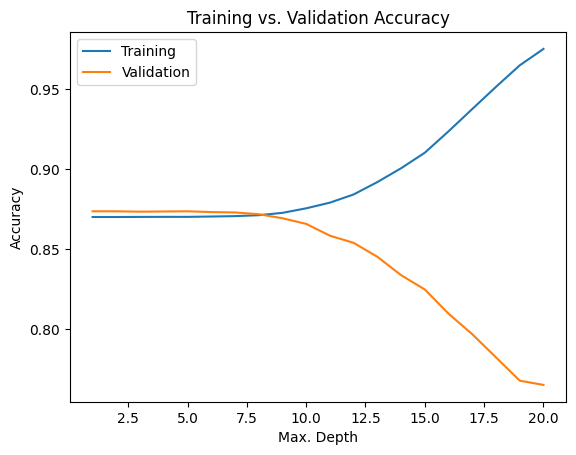

In [82]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Accuracy'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Accuracy'])
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Max. Depth')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation']);

In [83]:
dt_model = DecisionTreeClassifier(max_depth = 8,random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [84]:
train_preds = dt_model.predict(X_train)
val_preds = dt_model.predict(X_val)

In [85]:
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

In [86]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

Training Accuracy: 0.8712537313432835
Validation Accuracy: 0.8718787878787879


So,max_depth = 8 would be great choice for this model

##Train and Evaluate Random Forest




In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rf_model = RandomForestClassifier(n_jobs = 1,random_state = 42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [89]:
train_accuracy = rf_model.score(X_train, y_train)
val_accuracy = rf_model.score(X_val, y_val)

In [90]:
print(f"Random Forest Training Accuracy: {train_accuracy}")
print(f"Random Forest Validation Accuracy: {val_accuracy}")

Random Forest Training Accuracy: 0.9993731343283582
Random Forest Validation Accuracy: 0.8716363636363637


In [91]:
y_train.value_counts()/len(y_train)

,count
Survival_Status,
0.0,0.870119
1.0,0.129881


In [92]:
rf_model.classes_

array([0., 1.])

##Hyperparameter Tuning for Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    return model.score(X_train, y_train), model.score(X_val, y_val)

# Check the unique class labels in y_train
print(y_train.unique())  # This will help you confirm the class labels

# Example of testing parameters with updated class weights
results = test_params(n_estimators=50, max_features=9, max_depth=10, class_weight={0.0: 1, 1.0: 3})
print(results)


[0. 1.]
(0.8727164179104477, 0.8736969696969697)


Model accuracy has been increase by .003

In [103]:
predictions = rf_model.predict(X_test)  # Only pass X_test to predict
accuracy = accuracy_score(y_test, predictions) # Compare predictions with y_test

print("Accuracy:", accuracy)

Accuracy: 0.8728484848484849


By following best practices for data preparation, model training, and hyperparameter tuning, we achieved a validation and test accuracy of ***~87.3%***.